In [95]:
import warnings
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

%matplotlib inline
warnings.filterwarnings('ignore')

In [96]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

def plot_predict(_model, _series):
    end = len(_series)+20
    predictions = _model.get_prediction(1, end)
    mean = predictions.predicted_mean
    ci = np.asarray(predictions.conf_int(0.05))
    _, _, out_of_sample, _ = _model.model._get_prediction_index(1, end)
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=(14,8))
        ax = fig.add_subplot(111)
        ax.plot(_series, color='red', label='Series')
        ax.plot(mean, zorder=2, label='forecast')

        lower, upper = ci[-out_of_sample:, 0], ci[-out_of_sample:, 1]
        label = "{0:.0%} confidence interval".format(1 - 0.05)
        x = ax.get_lines()[-1].get_xdata()
        ax.fill_between(
            x[-out_of_sample:],
            lower,
            upper,
            color="gray",
            alpha=0.5,
            label=label,
            zorder=1,
        )

        plt.legend()
        plt.show()


In [97]:
df = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
print(df.columns)
series = df['Deg']

Index(['Month', 'Deg'], dtype='object')


Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


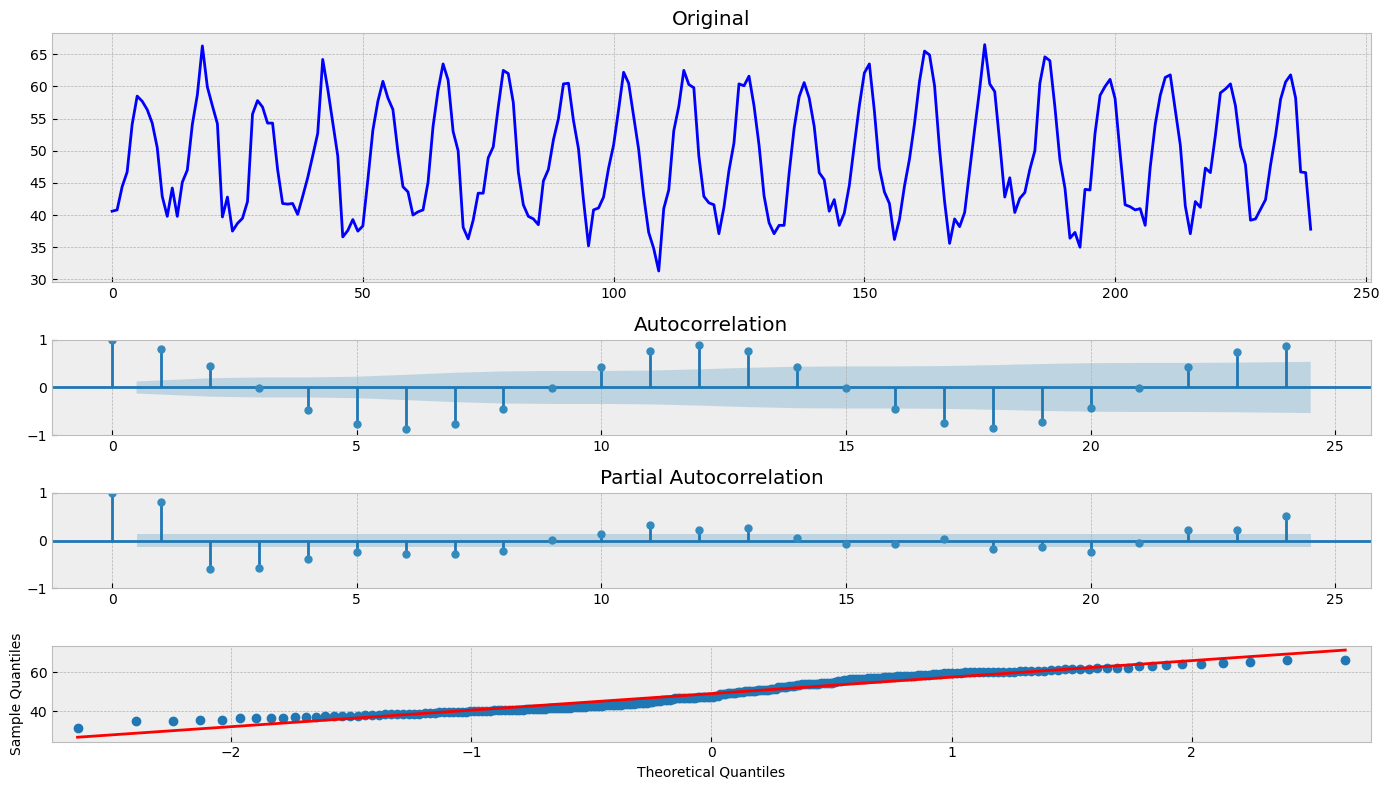

In [98]:
tsplot(series)

aic: 1137.38771 | order: (3, 1, 3)
Results of Dickey-Fuller Test:
Test Statistic                -6.988598e+00
p-value                        7.850773e-10
#Lags Used                     5.000000e+00
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64


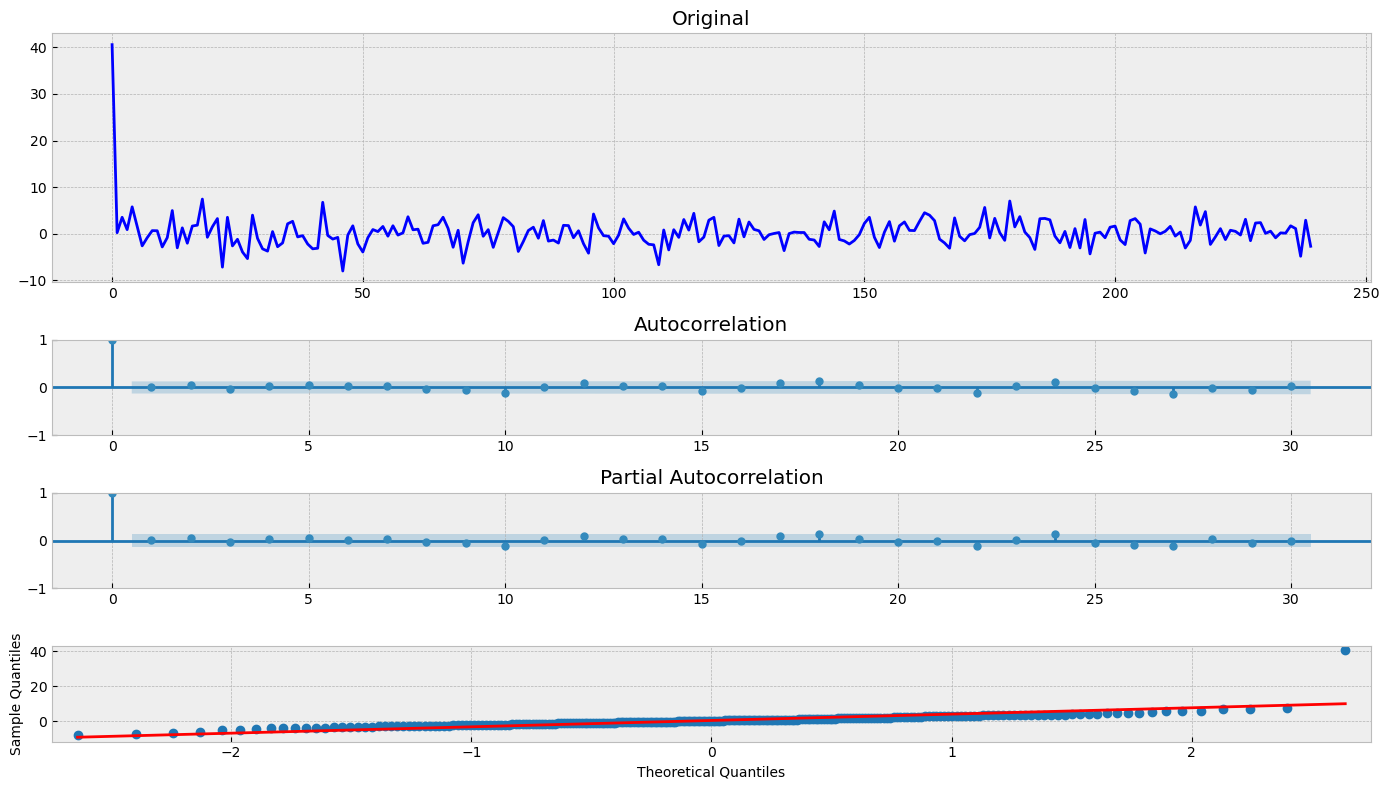

In [99]:
max_lag = 30
best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j), trend='n').fit(method='statespace')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except Exception as e:
                print(e)


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=30)

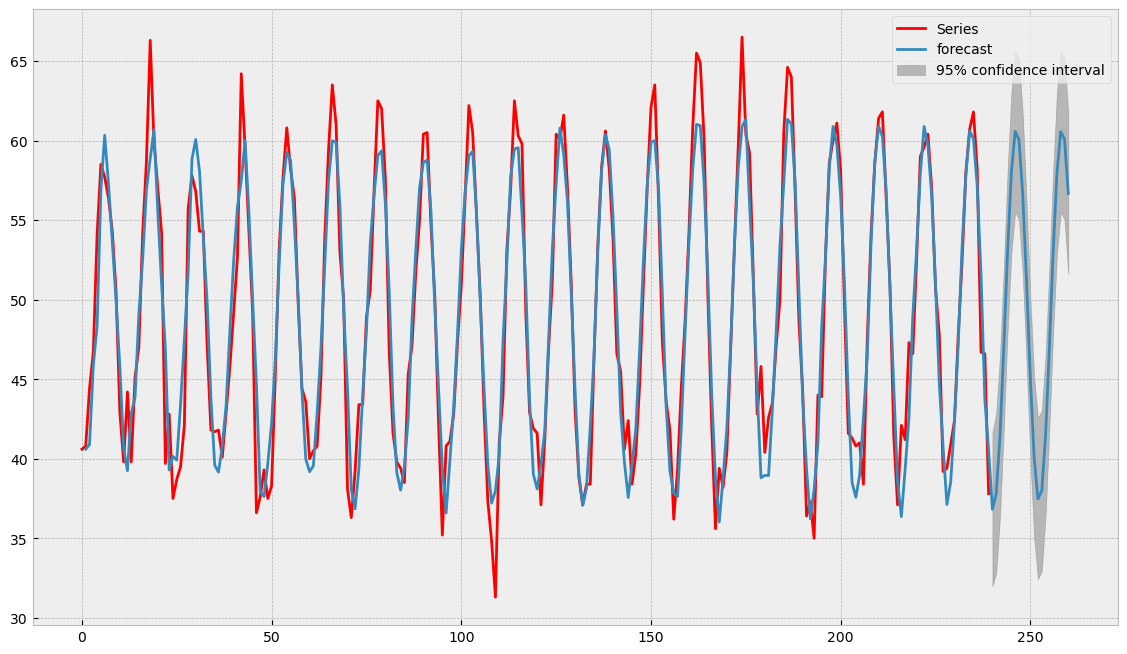

In [100]:
plot_predict(best_mdl, series)

In [101]:
df = pd.read_csv("Series/daily-total-female-births-in-cal.csv")
print(df.columns)
series = df['Count']

Index(['Date', 'Count'], dtype='object')


Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


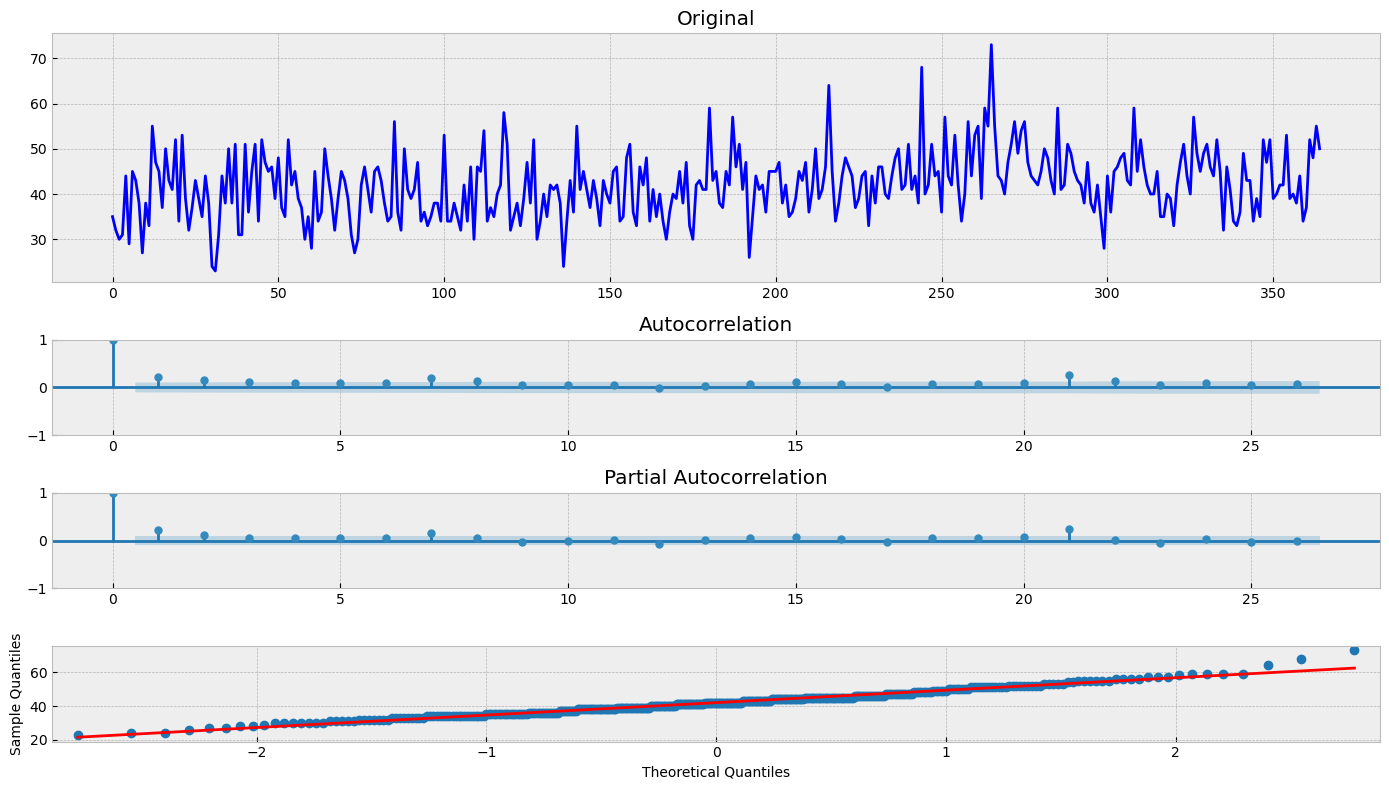

In [102]:
tsplot(series)

LU decomposition error.
aic: 2457.99355 | order: (3, 1, 4)
Results of Dickey-Fuller Test:
Test Statistic                 -19.304628
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


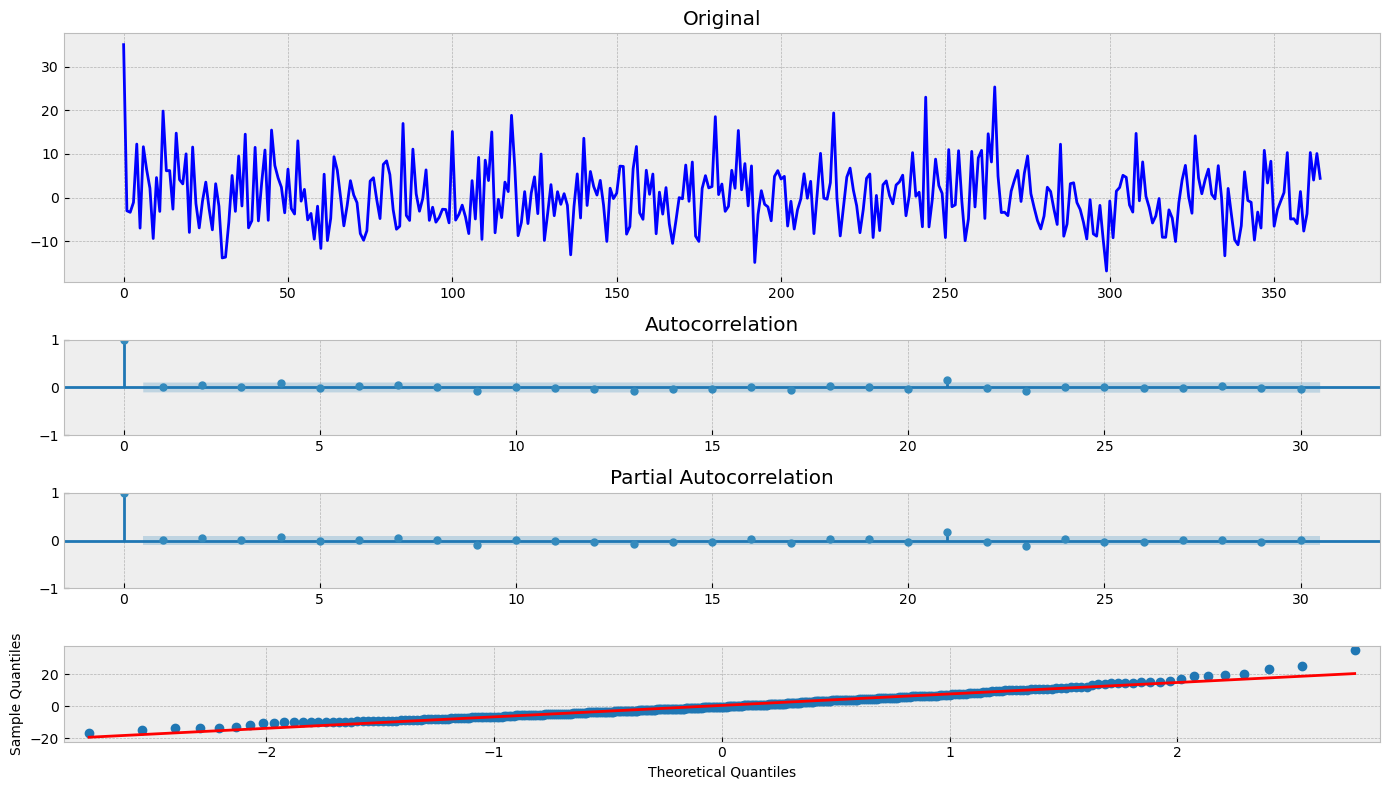

In [103]:
max_lag = 30
best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j), trend='n').fit(method='statespace')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except Exception as e:
                print(e)


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=30)

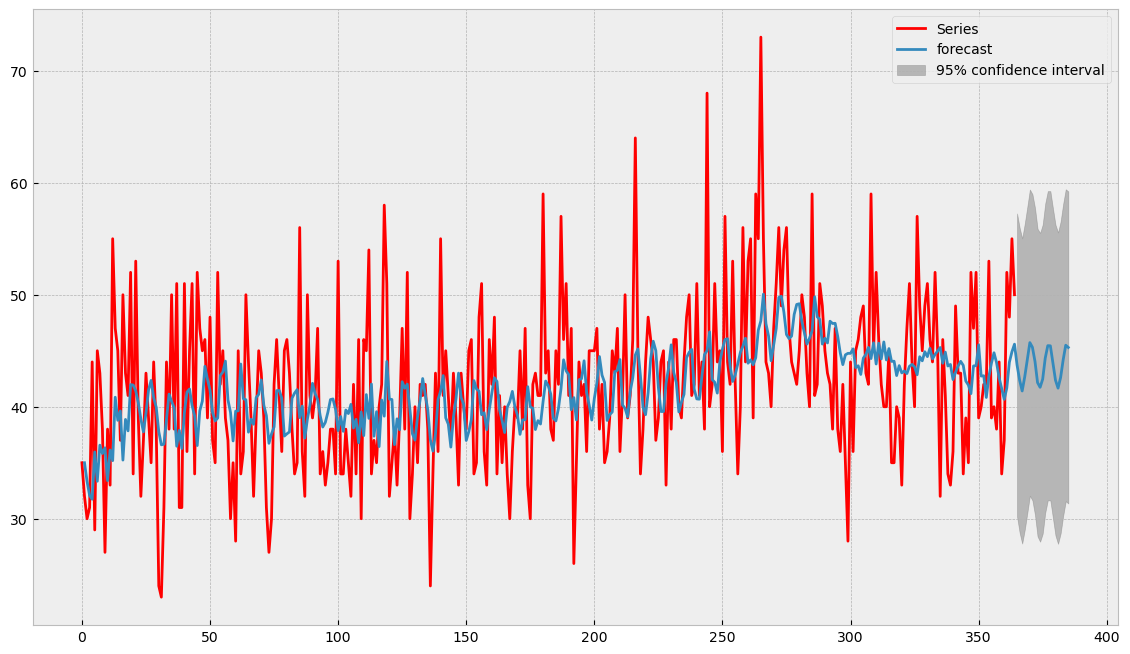

In [104]:
plot_predict(best_mdl, series)

In [105]:
df = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
print(df.columns)
series = df['Close']

Index(['Week', 'Close'], dtype='object')


Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


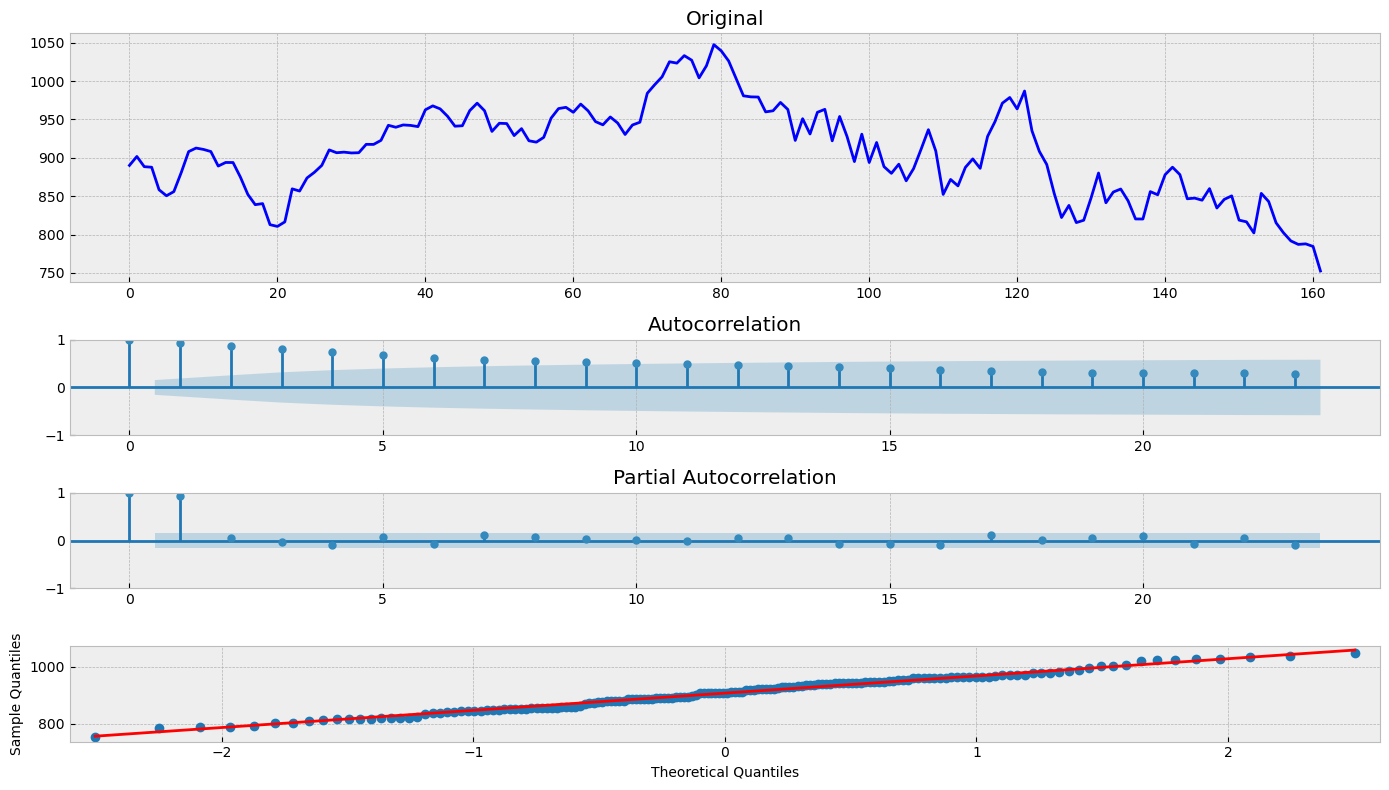

In [106]:
tsplot(series)

aic: 1416.32751 | order: (2, 2, 3)
Results of Dickey-Fuller Test:
Test Statistic                 -51.719727
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


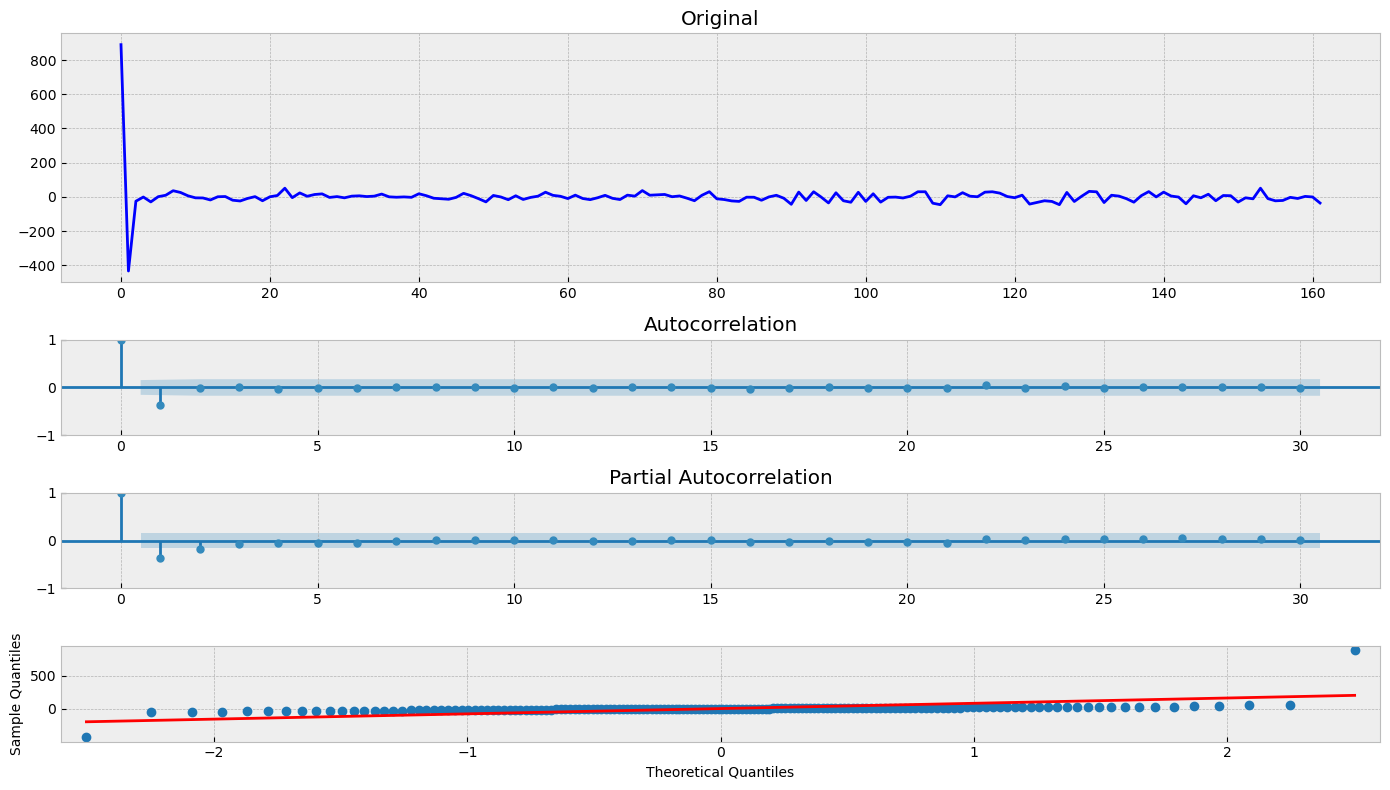

In [107]:
max_lag = 30
best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j), trend='n').fit(method='statespace')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except Exception as e:
                print(e)


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=30)

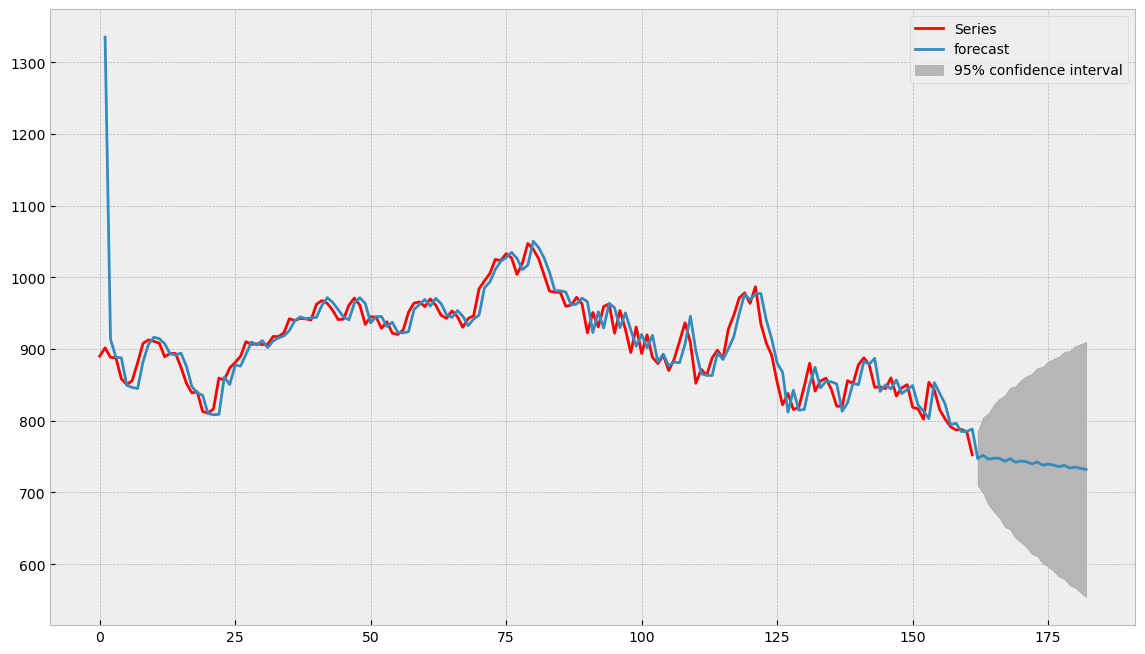

In [108]:
plot_predict(best_mdl, series)